In [5]:
## 1. Import Libraries & Create Imbalanced Dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

In [8]:
# Create imbalanced dataset (90% class 0, 10% class 1)
X, y = make_classification(n_samples=800, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, weights=[0.9, 0.1], n_clusters_per_class=1, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
## 2. Train Model WITHOUT Fixing Imbalance
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy (No Fix):", acc)
cm = confusion_matrix(y_test, y_pred)
cm

Accuracy (No Fix): 0.9166666666666666


array([[211,   6],
       [ 14,   9]])

In [10]:
## 3. Apply SMOTE (Oversampling Minority Class)
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Check counts
unique, counts = np.unique(y_train_sm, return_counts=True)
dict(zip(unique, counts))

{np.int64(0): np.int64(497), np.int64(1): np.int64(497)}

In [11]:
## 4. Train Model WITH SMOTE
model_sm = LogisticRegression()
model_sm.fit(X_train_sm, y_train_sm)

y_pred_sm = model_sm.predict(X_test)
acc_sm = accuracy_score(y_test, y_pred_sm)

print("Accuracy (SMOTE):", acc_sm)
confusion_matrix(y_test, y_pred_sm)

Accuracy (SMOTE): 0.8708333333333333


array([[188,  29],
       [  2,  21]])

In [12]:
## 5. Class Weight Approach
model_w = LogisticRegression(class_weight='balanced')
model_w.fit(X_train, y_train)

y_pred_w = model_w.predict(X_test)
acc_w = accuracy_score(y_test, y_pred_w)

print("Accuracy (Class Weight):", acc_w)
confusion_matrix(y_test, y_pred_w)

Accuracy (Class Weight): 0.8666666666666667


array([[187,  30],
       [  2,  21]])

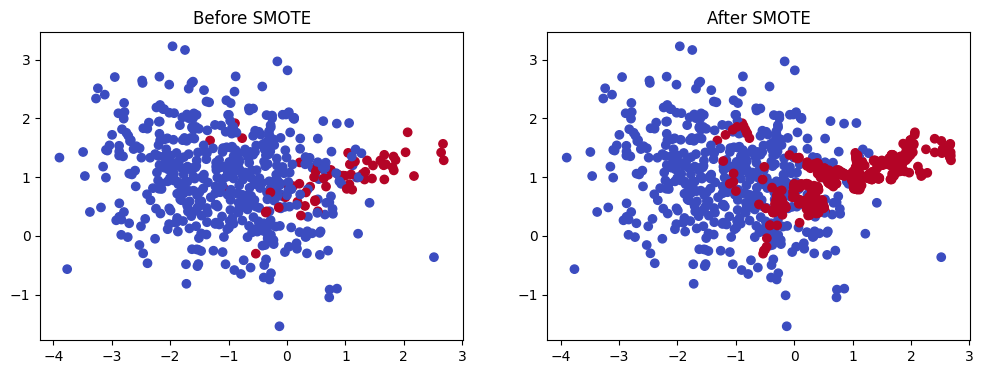

In [13]:
## 6. Visualize Original vs SMOTE Data
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='coolwarm')
plt.title("Before SMOTE")

plt.subplot(1,2,2)
plt.scatter(X_train_sm[:,0], X_train_sm[:,1], c=y_train_sm, cmap='coolwarm')
plt.title("After SMOTE")

plt.show()